REF: https://github.com/tana777/ds-take-home-challenge/blob/master/02.Spanish_Translation_AB_Test.ipynb

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

## Description

Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

#### Goal

1. Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
2. Explain why that might be happening. Are the localized translations really worse?
3. If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

#### Data description

In [12]:
dat_test = pd.read_csv("test_table.csv")
dat_user = pd.read_csv("user_table.csv")

In [3]:
dat_test.head(6)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1


In [13]:
dat_user.head(6)

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain
5,62371,M,29,Ecuador


In [14]:
print(dat_test.shape)
print(dat_user.shape)

(453321, 9)
(452867, 4)


In [8]:
dat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [9]:
print('Variable', '   ', 'count of unique value','  ', 'content')
for column in dat_test.columns:
    uniques = dat_test[column].unique()
    print('{0:20s} {1:4d}\t'.format(column, len(uniques)), uniques[:10])

Variable     count of unique value    content
user_id              453321	 [315281 497851 848402 290051 548435 540675 863394 527287 261625  10427]
date                    5	 ['2015-12-03' '2015-12-04' '2015-11-30' '2015-12-01' '2015-12-02']
source                  3	 ['Direct' 'Ads' 'SEO']
device                  2	 ['Web' 'Mobile']
browser_language        3	 ['ES' 'Other' 'EN']
ads_channel             6	 [nan 'Google' 'Facebook' 'Bing' 'Yahoo' 'Other']
browser                 7	 ['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App' 'Safari' 'Opera']
conversion              2	 [1 0]
test                    2	 [0 1]


In [16]:
print('Variable', '   ', 'count of unique value','  ', 'content')
for column in dat_user.columns:
    uniques = dat_user[column].unique()
    print('{0:20s} {1:4d}\t'.format(column, len(uniques)), uniques[:5])

Variable     count of unique value    content
user_id              452867	 [765821 343561 118744 987753 554597]
sex                     2	 ['M' 'F']
age                    52	 [20 27 23 29 31]
country                17	 ['Mexico' 'Nicaragua' 'Colombia' 'Venezuela' 'Spain']


## Q1: confirm that the test is negative

In [17]:
# Merge two tables and use left join
data=pd.merge(dat_test,dat_user,how='left',on='user_id')

In [19]:
data.head(6)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela


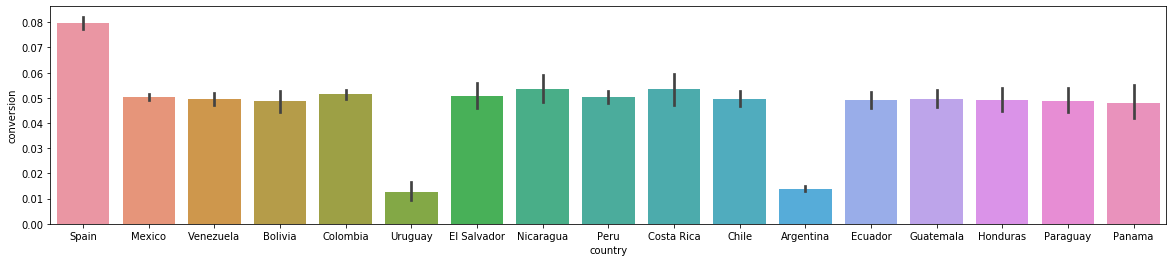

In [20]:
fig,ax=plt.subplots(1,1,figsize=(20,4))
sns.barplot(x=data['country'],y=data['conversion']);

let's run a t-test here:

In [22]:
dat_no_Spain = data[data["country"]!="Spain"]
control = dat_no_Spain[dat_no_Spain["test"]==0]
test = dat_no_Spain[dat_no_Spain["test"]==1]

In [35]:
mean_con = control["conversion"].values.mean()
mean_test = test["conversion"].values.mean()
print('Mean of control group:','\t',mean_con)
print('Mean of test group:','\t',mean_test)

Mean of control group: 	 0.04833042316066309
Mean of test group: 	 0.043424713982118966


In [30]:
from scipy.stats import ttest_ind

In [33]:
ttest_ind(control["conversion"],test["conversion"], equal_var=False)

Ttest_indResult(statistic=7.3939374121344805, pvalue=1.4282994754055316e-13)

p-value is less than 0.05, no evidence shows that old version is better.

## Q2: Explain why that might be happening. Are the localized translations really worse?

In [75]:
def cate_plot(dat, targetname, cate_colnames):
    ## dat is the dataset
    ## target name is the column name of predicted value 
    plt.figure(figsize=(18,4*4))
    gs = gridspec.GridSpec(4,5)
    cols = cate_colnames
    ## get the colnames of numerical data
    df = dat[cols]
    for i, cn in enumerate(df):
        ax = plt.subplot(gs[i])
        sns.countplot(x=df[cn], hue=df[targetname])
        #sns.distplot(df[cn].dropna())
        ## get rid off missing values
        ax.set_xlabel('')
        ax.set_title('histogram of feature: ' + cn)
    plt.show()

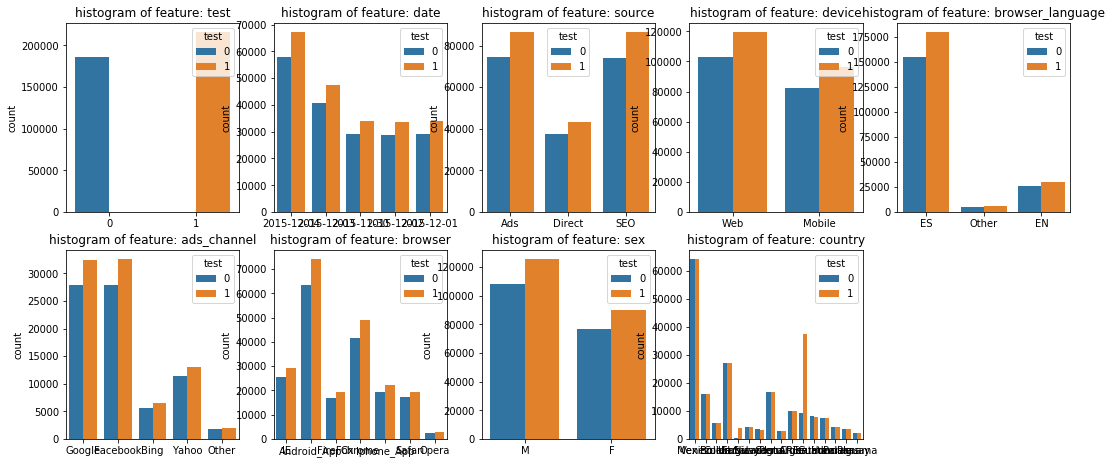

In [76]:
cate_colnames = ["test",'date', 'source' ,'device','browser_language','ads_channel','browser','sex', 'country']
cate_plot(dat_no_Spain, 'test', cate_colnames)

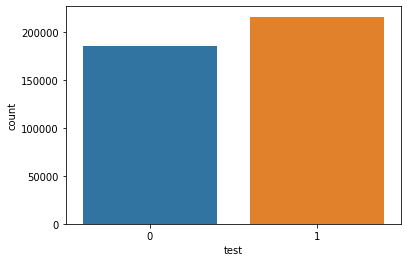

In [69]:
sns.countplot(x=dat_no_Spain["test"])

As shown above, a big diffence appears at "country" column.

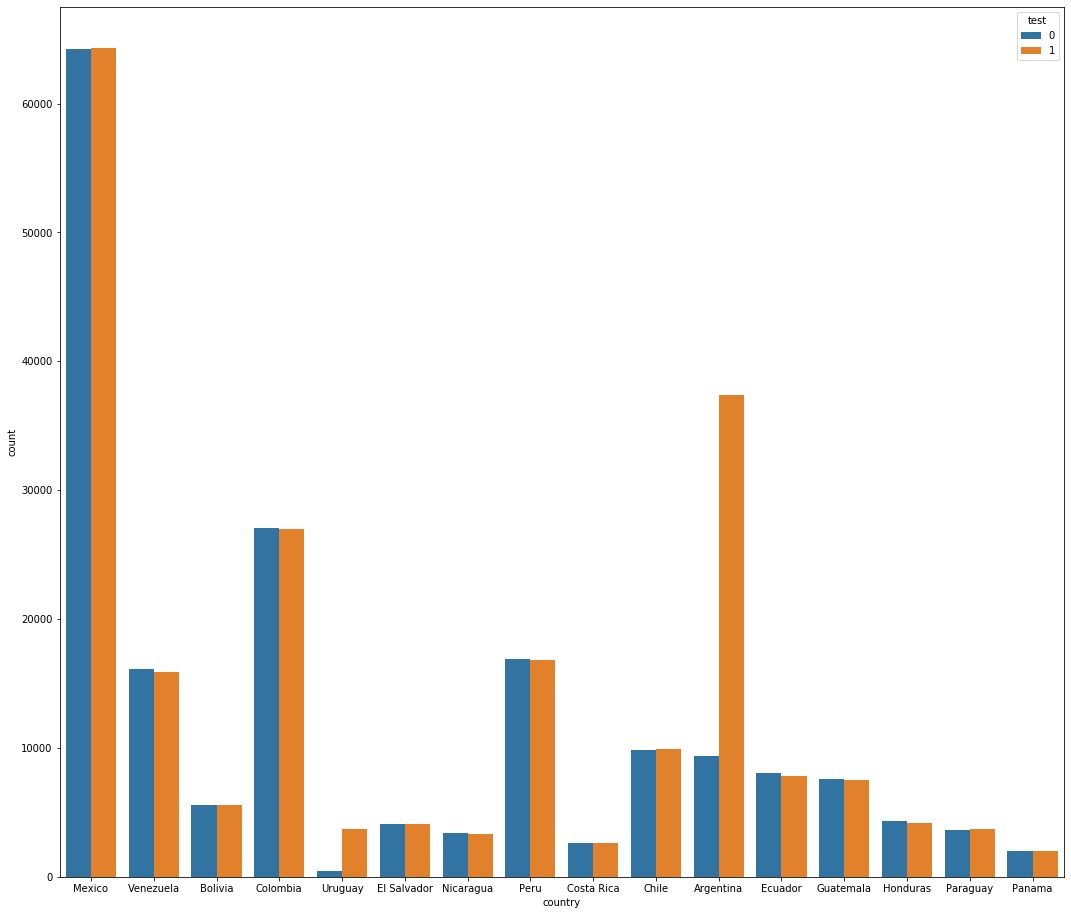

In [70]:
plt.figure(figsize=(18,4*4))
sns.countplot(x=dat_no_Spain["country"], hue=dat_no_Spain["test"])

In [97]:
def conversion_plot(dat, targetname, cate_colnames):
    ## dat is the dataset
    ## target name is the column name of predicted value 
    plt.figure(figsize=(18,4*4))
    gs = gridspec.GridSpec(4,5)
    cols = cate_colnames
    ## get the colnames of numerical data
    df = dat[cols]
    for i, cn in enumerate(df):
        ax = plt.subplot(gs[i])
        sns.catplot(x=cn, y=targetname, hue = "test", kind = "bar", data =df)
        ax.set_xlabel('')
        ax.set_title('histogram of feature: ' + cn)
    plt.show()

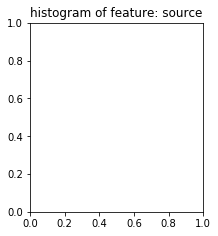

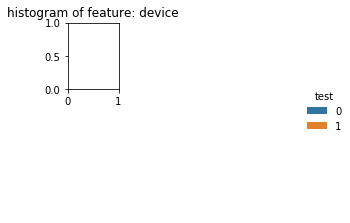

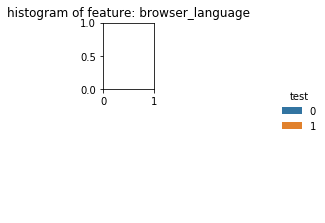

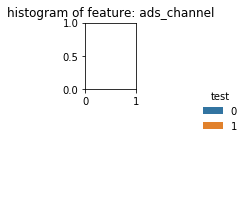

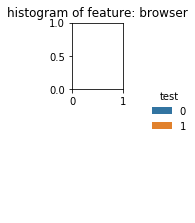

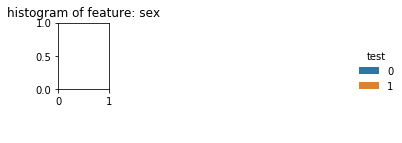

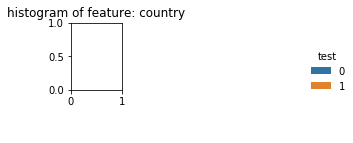

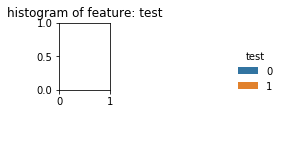

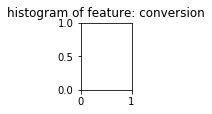

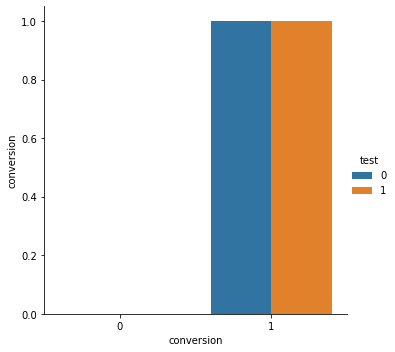

In [99]:
cate_colnames = ['source' ,'device','browser_language','ads_channel','browser','sex', 'country',"test","conversion"]
conversion_plot(dat_no_Spain, 'conversion', cate_colnames)

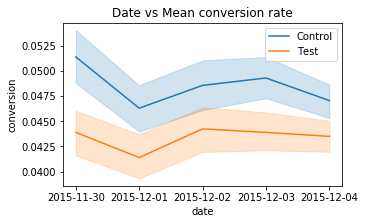

In [72]:
# Date variable visualization
plt.subplots(1,1,figsize=(5,3))
plt.title('Date vs Mean conversion rate')
sns.lineplot(x='date',y='conversion',data=control,err_style='band',label='Control')
sns.lineplot(x='date',y='conversion',data=test,err_style='band',label='Test');
plt.legend();

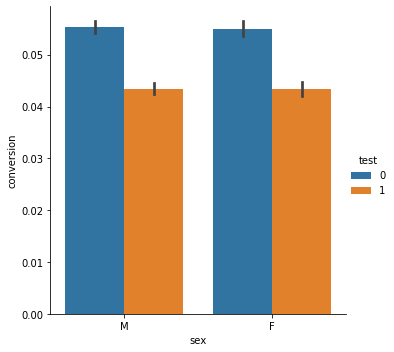

In [96]:
sns.catplot(x="sex", y="conversion", hue = "test", kind = "bar", data =data)